In [21]:
import datetime
import pandas as pd
import data_cleaner
import matplotlib.pyplot as plt

data_file = "nba_odds_2019-20.xlsx"
team_abvs = ['GSW', 'BOS', 'HOU', 'LAL', 'TOR', 'PHI', 'OKC', 'MIL', 'NOP', 'SAS', 'UTA', 'WAS', 'IND', 'DEN', 'MIN', 'POR', 'MIA', 'NYK', 'DAL', 'DET', 'LAC', 'CHI', 'CLE', 'CHO', 'MEM', 'ORL', 'PHO', 'BRK', 'ATL', 'SAC']

In [2]:
master = data_cleaner.get_clean_data()

0 1
1 0
2 3
3 2
4 5
5 4
6 7
7 6
8 9
9 8
10 11
11 10
12 13
13 12
14 15
15 14
16 17
17 16
18 19
19 18
20 21
21 20
22 23
23 22
24 25
25 24
26 27
27 26
28 29
29 28
30 31
31 30
32 33
33 32
34 35
35 34
36 37
37 36
38 39
39 38
40 41
41 40
42 43
43 42
44 45
45 44
46 47
47 46
48 49
49 48
50 51
51 50
52 53
53 52
54 55
55 54
56 57
57 56
58 59
59 58
60 61
61 60
62 63
63 62
64 65
65 64
66 67
67 66
68 69
69 68
70 71
71 70
72 73
73 72
74 75
75 74
76 77
77 76
78 79
79 78
80 81
81 80
82 83
83 82
84 85
85 84
86 87
87 86
88 89
89 88
90 91
91 90
92 93
93 92
94 95
95 94
96 97
97 96
98 99
99 98
100 101
101 100
102 103
103 102
104 105
105 104
106 107
107 106
108 109
109 108
110 111
111 110
112 113
113 112
114 115
115 114
116 117
117 116
118 119
119 118
120 121
121 120
122 123
123 122
124 125
125 124
126 127
127 126
128 129
129 128
130 131
131 130
132 133
133 132
134 135
135 134
136 137
137 136
138 139
139 138
140 141
141 140
142 143
143 142
144 145
145 144
146 147
147 146
148 149
149 148
150 151
151 150
152 

1054 1055
1055 1054
1056 1057
1057 1056
1058 1059
1059 1058
1060 1061
1061 1060
1062 1063
1063 1062
1064 1065
1065 1064
1066 1067
1067 1066
1068 1069
1069 1068
1070 1071
1071 1070
1072 1073
1073 1072
1074 1075
1075 1074
1076 1077
1077 1076
1078 1079
1079 1078
1080 1081
1081 1080
1082 1083
1083 1082
1084 1085
1085 1084
1086 1087
1087 1086
1088 1089
1089 1088
1090 1091
1091 1090
1092 1093
1093 1092
1094 1095
1095 1094
1096 1097
1097 1096
1098 1099
1099 1098
1100 1101
1101 1100
1102 1103
1103 1102
1104 1105
1105 1104
1106 1107
1107 1106
1108 1109
1109 1108
1110 1111
1111 1110
1112 1113
1113 1112
1114 1115
1115 1114
1116 1117
1117 1116
1118 1119
1119 1118
1120 1121
1121 1120
1122 1123
1123 1122
1124 1125
1125 1124
1126 1127
1127 1126
1128 1129
1129 1128
1130 1131
1131 1130
1132 1133
1133 1132
1134 1135
1135 1134
1136 1137
1137 1136
1138 1139
1139 1138
1140 1141
1141 1140
1142 1143
1143 1142
1144 1145
1145 1144
1146 1147
1147 1146
1148 1149
1149 1148
1150 1151
1151 1150
1152 1153
1153 1152


In [20]:
#add the over and the under label
totals_df = master[["date", "team", "opp_team", "final_score", "opp_final_score", "total", "OT"]]

# calculate the over under for each team
# return 1 = over
# return 0 = push
# return -1 = under
def over_under(row):
    total_score = row.final_score + row.opp_final_score
    total = row.total
    
    if(total < total_score):
        return 1
    if(total > total_score):
        return -1
    
    #if the two ifs werent triggered its a push
    return 0

#calculate the total score
def calc_total_score(row):
    return row.final_score + row.opp_final_score

totals_df["OU_result"] = totals_df.apply(lambda row: over_under(row), axis=1)
totals_df["total_score"] = totals_df.apply(lambda row: calc_total_score(row), axis=1)
totals_df.head(5)

/Users/homefolder/Documents/Code/Python/hot_winners/nba_odds/env_nba_odds/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/homefolder/Documents/Code/Python/hot_winners/nba_odds/env_nba_odds/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,team,opp_team,final_score,opp_final_score,total,OT,OU_result,total_score
0,2019-10-22,NOP,TOR,122,130,229.5,1,1,252
1,2019-10-22,TOR,NOP,130,122,229.5,1,1,252
2,2019-10-22,LAL,LAC,102,112,224.0,0,-1,214
3,2019-10-22,LAC,LAL,112,102,224.0,0,-1,214
4,2019-10-23,DET,IND,119,110,211.0,0,1,229


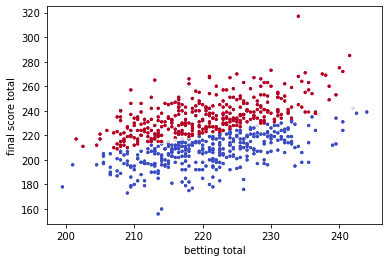

In [74]:
#make the plot

plot_df = totals_df

x = plot_df["total"]
y = plot_df["total_score"]
c = plot_df["OU_result"]

plt.scatter(x,y, s=5, c=c, cmap="coolwarm")
plt.xlabel("betting total")
plt.ylabel("final score total")
plt.show()